In [13]:
import sys
import os
import importlib

# Add src folder to sys.path if needed
sys.path.append(os.path.abspath(".."))

# Import and reload module to ensure latest changes
import src.sentiment as sentiment_analysis
importlib.reload(sentiment_analysis)

# Import functions after reload
from src.sentiment import analyze_sentiments, aggregate_sentiments
import pandas as pd

# Load your data
df = pd.read_csv("../data/all_banks_reviews.csv")

# Make sure your data has 'bank', 'rating', and 'review' columns
print(df.head())

# Run sentiment analysis (choose 'vader' or 'textblob')
df_with_sentiment = analyze_sentiments(df, model='vader')

# Save results
df_with_sentiment.to_csv("../data/all_banks_reviews_with_sentiment.csv", index=False)

# Aggregate results by bank and rating
aggregated_df = aggregate_sentiments(df_with_sentiment)

# Save aggregated data
aggregated_df.to_csv("../data/aggregated_sentiment_summary.csv", index=False)

# Show a sample of aggregated results
print(aggregated_df.head())


                                              review  rating        date  \
0  really am happy to this app it is Siple to use...       5  2025-06-07   
1  I liked this app. But the User interface is ve...       2  2025-06-07   
2  "Why don’t your ATMs support account-to-accoun...       4  2025-06-06   
3                        what is this app problem???       1  2025-06-05   
4       the app is proactive and a good connections.       5  2025-06-05   

                        source  
0  Commercial Bank of Ethiopia  
1  Commercial Bank of Ethiopia  
2  Commercial Bank of Ethiopia  
3  Commercial Bank of Ethiopia  
4  Commercial Bank of Ethiopia  


🔍 Analyzing Sentiments (vader): 100%|██████████| 1200/1200 [00:00<00:00, 5263.78it/s]


       source  rating  mean_sentiment_score  \
0  BoA Mobile       1             -0.159651   
1  BoA Mobile       2              0.132891   
2  BoA Mobile       3              0.192516   
3  BoA Mobile       4              0.333017   
4  BoA Mobile       5              0.348110   

                              sentiment_distribution  
0  {'negative': 0.4817073170731707, 'neutral': 0....  
1  {'neutral': 0.45454545454545453, 'positive': 0...  
2  {'positive': 0.5483870967741935, 'neutral': 0....  
3  {'positive': 0.6111111111111112, 'neutral': 0....  
4  {'positive': 0.6818181818181818, 'neutral': 0....  


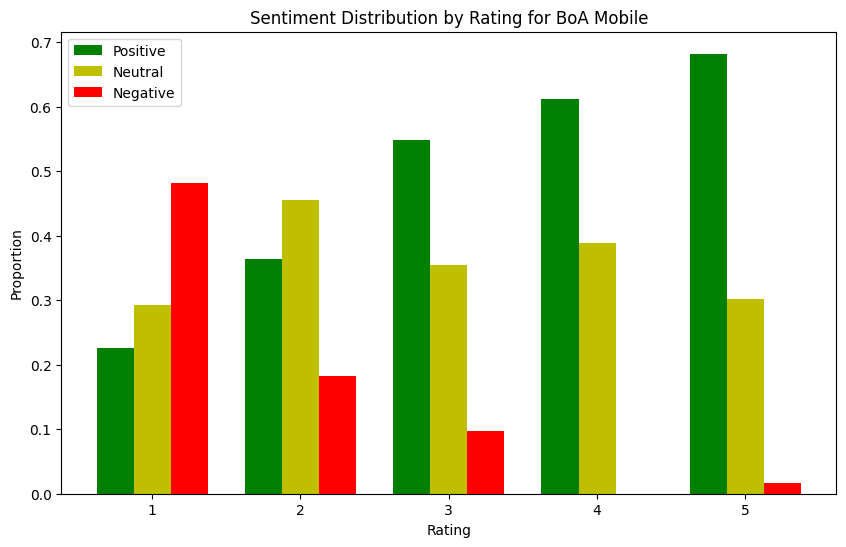

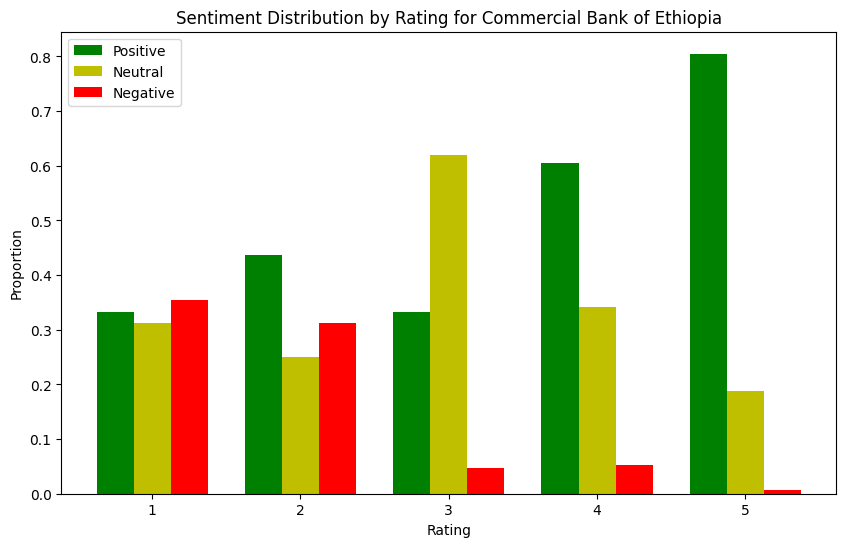

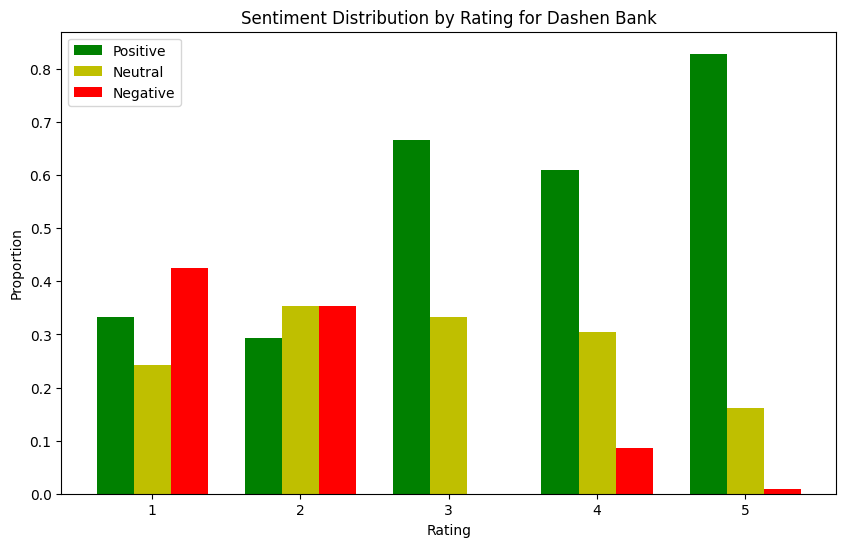

In [16]:
import matplotlib.pyplot as plt

# Expand the sentiment_distribution dict into separate columns
dist_df = aggregated_df.copy()

# Create columns for positive, negative, neutral proportions
def extract_sentiment_proportions(d):
    # d is a dict like {'positive': 0.7, 'neutral': 0.2, 'negative': 0.1}
    return pd.Series({
        'positive': d.get('positive', 0),
        'neutral': d.get('neutral', 0),
        'negative': d.get('negative', 0),
    })

sentiment_props = dist_df['sentiment_distribution'].apply(extract_sentiment_proportions)
dist_df = pd.concat([dist_df.drop(columns=['sentiment_distribution']), sentiment_props], axis=1)

# Plot bar charts grouped by bank and rating
for source in dist_df['source'].unique():
    plt.figure(figsize=(10, 6))
    subset = dist_df[dist_df['source'] == source]
    subset = subset.sort_values('rating')

    bar_width = 0.25
    ratings = subset['rating'].astype(str)
    x = range(len(ratings))

    plt.bar(x, subset['positive'], width=bar_width, label='Positive', color='g')
    plt.bar([i + bar_width for i in x], subset['neutral'], width=bar_width, label='Neutral', color='y')
    plt.bar([i + 2*bar_width for i in x], subset['negative'], width=bar_width, label='Negative', color='r')

    plt.xticks([i + bar_width for i in x], ratings)
    plt.xlabel('Rating')
    plt.ylabel('Proportion')
    plt.title(f'Sentiment Distribution by Rating for {source}')
    plt.legend()
    plt.show()
